In [12]:
from  keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [13]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
x_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

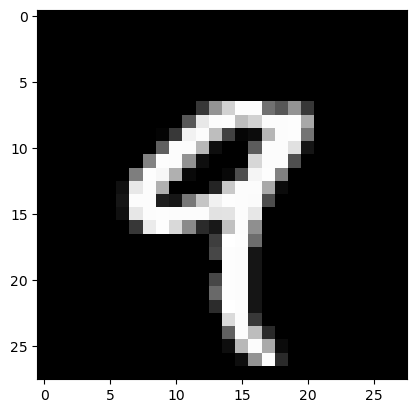

In [16]:
plt.imshow(x_train[4],cmap='gray')

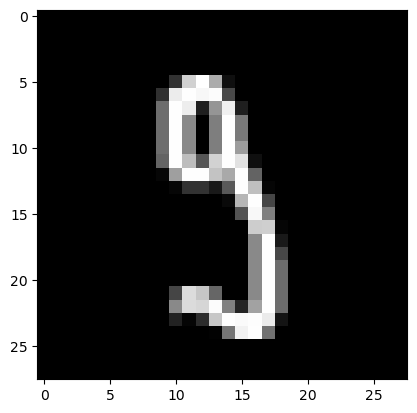

In [17]:
plt.imshow(x_train[48],cmap='gray')

In [18]:
y_train[48]

9

In [19]:
x_train=x_train/255
x_test=x_test/255

### Build the Neural Network

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [22]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='Softmax'))

In [23]:
model.summary();

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 512)              

In [25]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
model.fit(x_train,y_train,batch_size=10,epochs=5)

Epoch 1/5


6000/6000 [==============================] - 103s 17ms/step - loss: 0.0939 - accuracy: 0.9708
Epoch 2/5
6000/6000 [==============================] - 117s 19ms/step - loss: 0.0379 - accuracy: 0.9879
Epoch 3/5
3064/6000 [==============>...............] - ETA: 44s - loss: 0.0233 - accuracy: 0.9924

### Evaluate on test data

In [27]:
model.evaluate(x_test,y_test,batch_size=1)